In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('utils/')
from utils.DataVisualization import DataVisualization

## DataFrame:

### Completo:

In [3]:
path = r'../data/Dados Solução Casting.xlsx'
df = pd.read_excel(
    io=path
)

In [4]:
display(df.head(2))

,VUF_CODIGO,VUF_CODIGO_BOLETO,UND_CODIGO,FUN_CODIGO,VUF_DT,PRO_CODIGO,CAT_CODIGO,VUF_QTBOLETO,VUF_QTPRODUTO,VUF_VLRBRUTOVENDA,VUF_VLRDESCONTO,VUF_VLRLIQFINAL,VUF_VLRTROCA,CLV_BANCO
0,B28DDB4B-8A49-4658-8539-5DA3F20AA39F,1000,D4758B39-E7EA-4D97-B6B1-6236CE2C05A2,BBEF56E1-66E0-47A6-95AC-5479DE79577B,2022-06-18,6768760F-758A-4B31-AE33-CEB127A956CB,7B6AD9C1-F745-4137-B62D-4A67E865E781,1,1.0,15.0,0.0,15.0,0.0,CASTING_DB108
1,8E22E8FC-65DC-44BA-AFFA-4D661108F0B4,1001,D4758B39-E7EA-4D97-B6B1-6236CE2C05A2,AF858E1C-9C72-4B63-AC51-A8185ECCCC35,2022-06-18,0136ECF4-9F4D-4DBE-A78D-B2ED565CE60C,7B6AD9C1-F745-4137-B62D-4A67E865E781,1,1.0,32.0,0.0,32.0,0.0,CASTING_DB108


### Cliente (CASTING_DB106):

In [5]:
path = r'../data/dataset_CASTING_DB106.csv'
df_db106 = pd.read_csv(
    filepath_or_buffer=path,
    parse_dates=['VUF_DT'],
    index_col='VUF_DT',
    usecols=['VUF_DT', 'VUF_VLRLIQFINAL']
)

In [6]:
display(df_db106.head(2))

,VUF_VLRLIQFINAL
VUF_DT,
2023-05-10,152.0
2023-05-15,55.0


### Cliente (CASTING_DB108):

In [7]:
path = r'../data/dataset_CASTING_DB108.csv'
df_db108 = pd.read_csv(
    filepath_or_buffer=path,
    parse_dates=['VUF_DT'],
    index_col='VUF_DT',
    usecols=['VUF_DT', 'VUF_VLRLIQFINAL']
)

In [8]:
display(df_db108.head(2))

,VUF_VLRLIQFINAL
VUF_DT,
2022-06-18,15.0
2022-06-18,32.0


## Código:

In [9]:
class Casting(DataVisualization):
    pass

if __name__ == '__main__':
    casting = Casting()

## Preparação dos dados:

In [10]:
df['VUF_DT'] = pd.to_datetime(
    df['VUF_DT']
)

## Visualização de dados:

### Analise Descritiva:

#### Identificando Outliers:

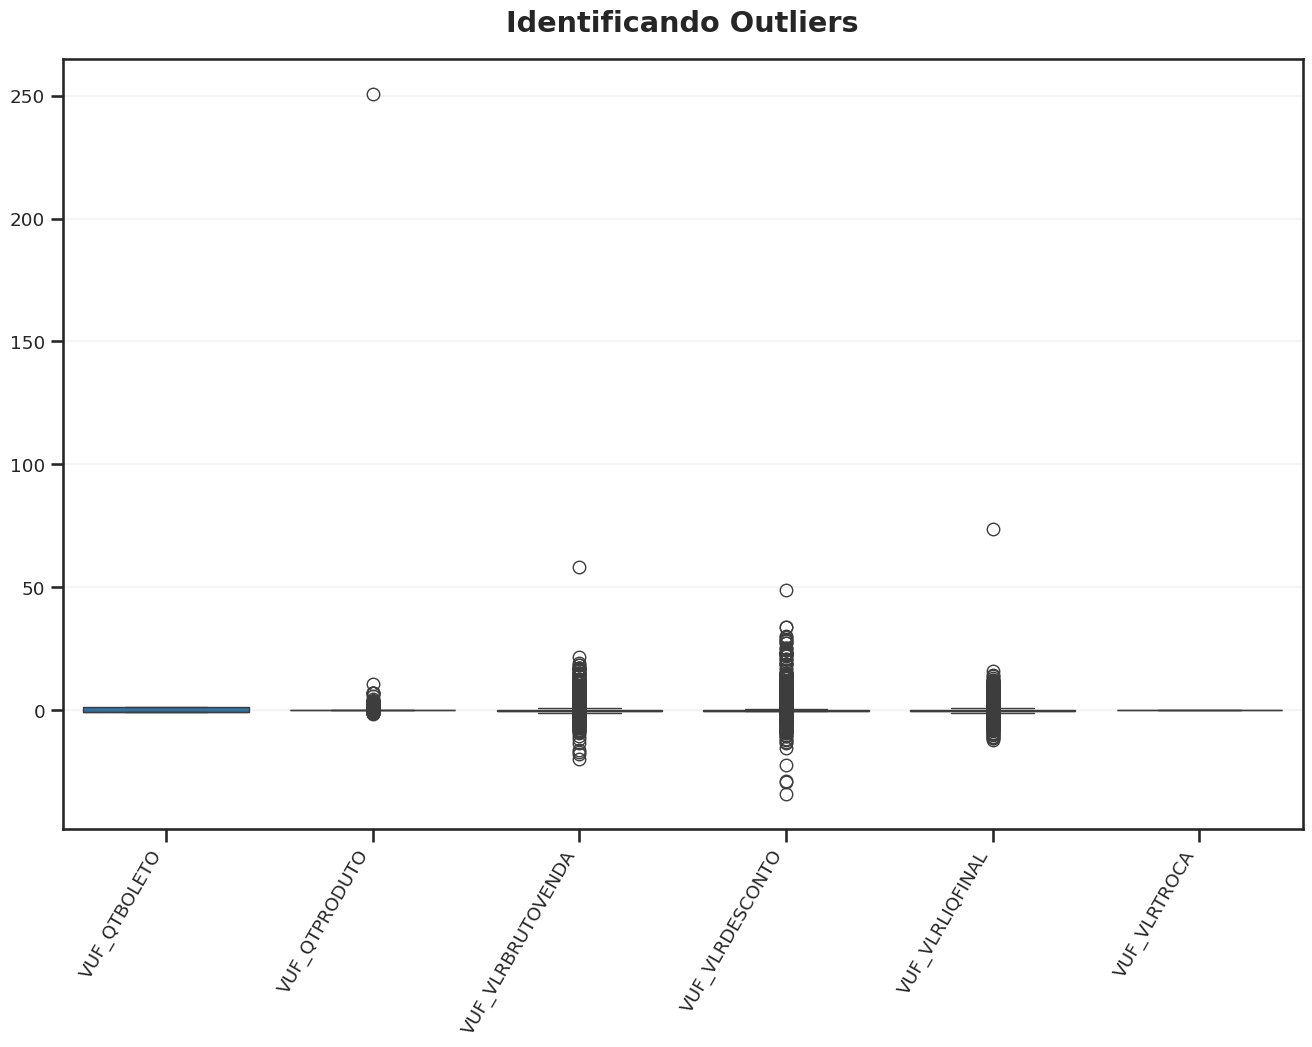

In [11]:
casting.gráfico_boxplot(
    dataframe=df,
    figsize=(16, 10),
    titulo='Identificando Outliers'
)

### Mapa de calor - Verificando Correlação:

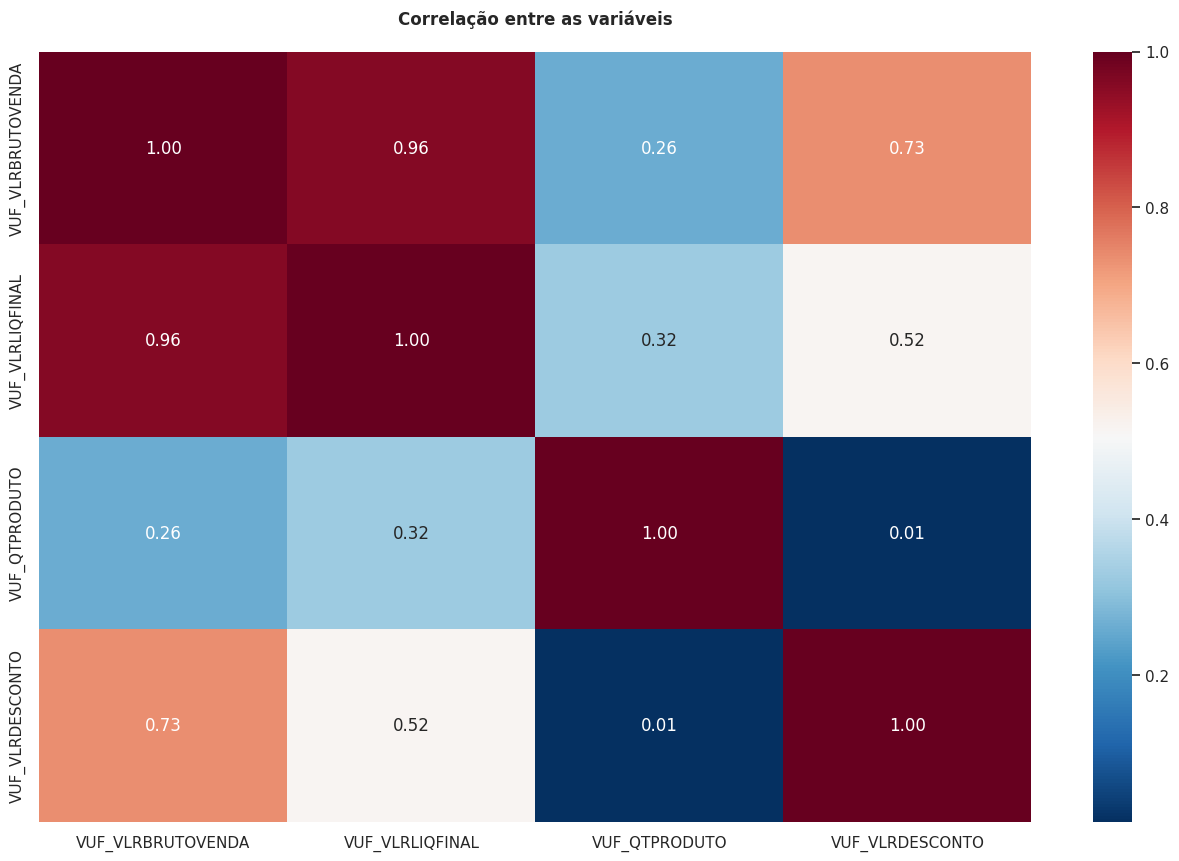

In [12]:
casting.gráfico_heatmap(
    dataframe=df[[
        "VUF_VLRBRUTOVENDA",
        "VUF_VLRLIQFINAL",
        "VUF_QTPRODUTO",
        "VUF_VLRDESCONTO",
    ]],
    titulo='Correlação entre as variáveis'
)

#### Gráfico de linha - Valor Bruto:

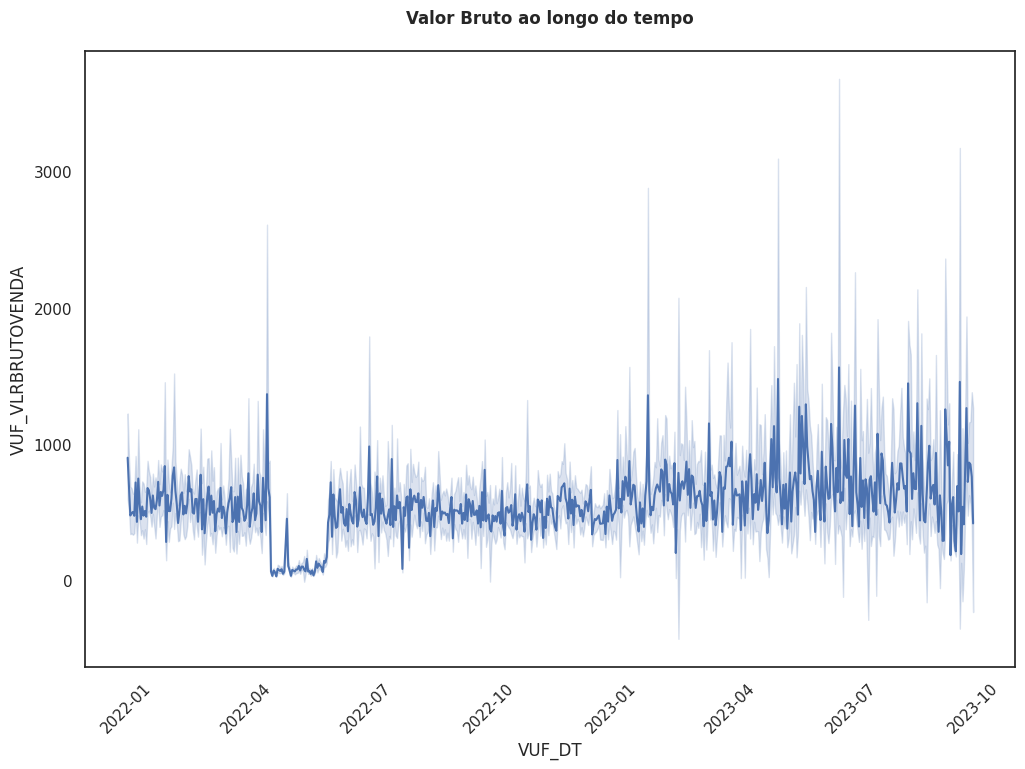

In [13]:
casting.gráfico_lineplot(
  dataframe=df,
  x='VUF_DT',
  y='VUF_VLRBRUTOVENDA',
  titulo='Valor Bruto ao longo do tempo'
)

#### Gráfico de linha - Valor Líquido:

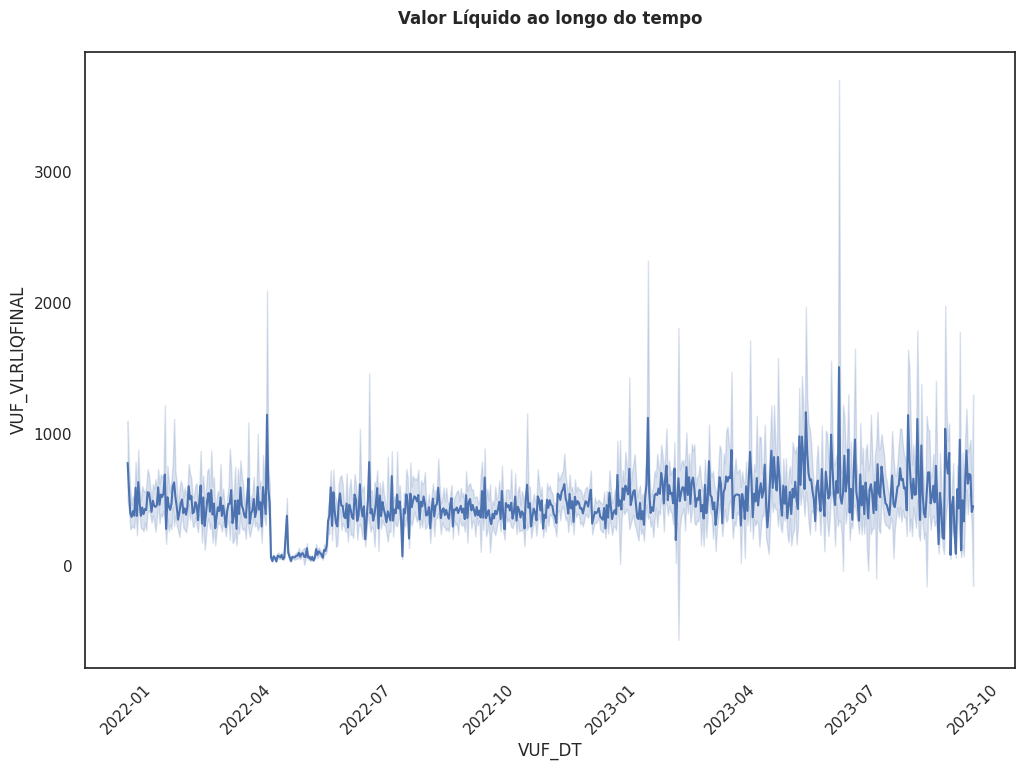

In [14]:
casting.gráfico_lineplot(
  dataframe=df,
  x='VUF_DT',
  y='VUF_VLRLIQFINAL',
  titulo='Valor Líquido ao longo do tempo'
)

#### Gráfico de linha - Quantidade de Boletos:

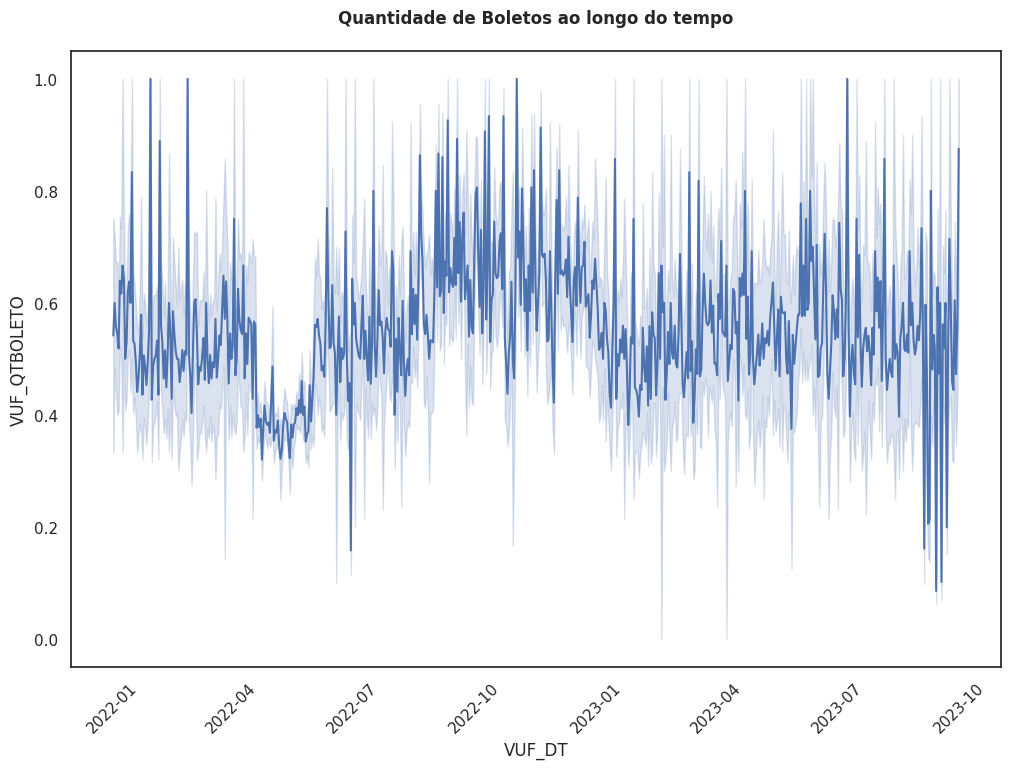

In [15]:
casting.gráfico_lineplot(
  dataframe=df,
  x='VUF_DT',
  y='VUF_QTBOLETO',
  titulo='Quantidade de Boletos ao longo do tempo'
)

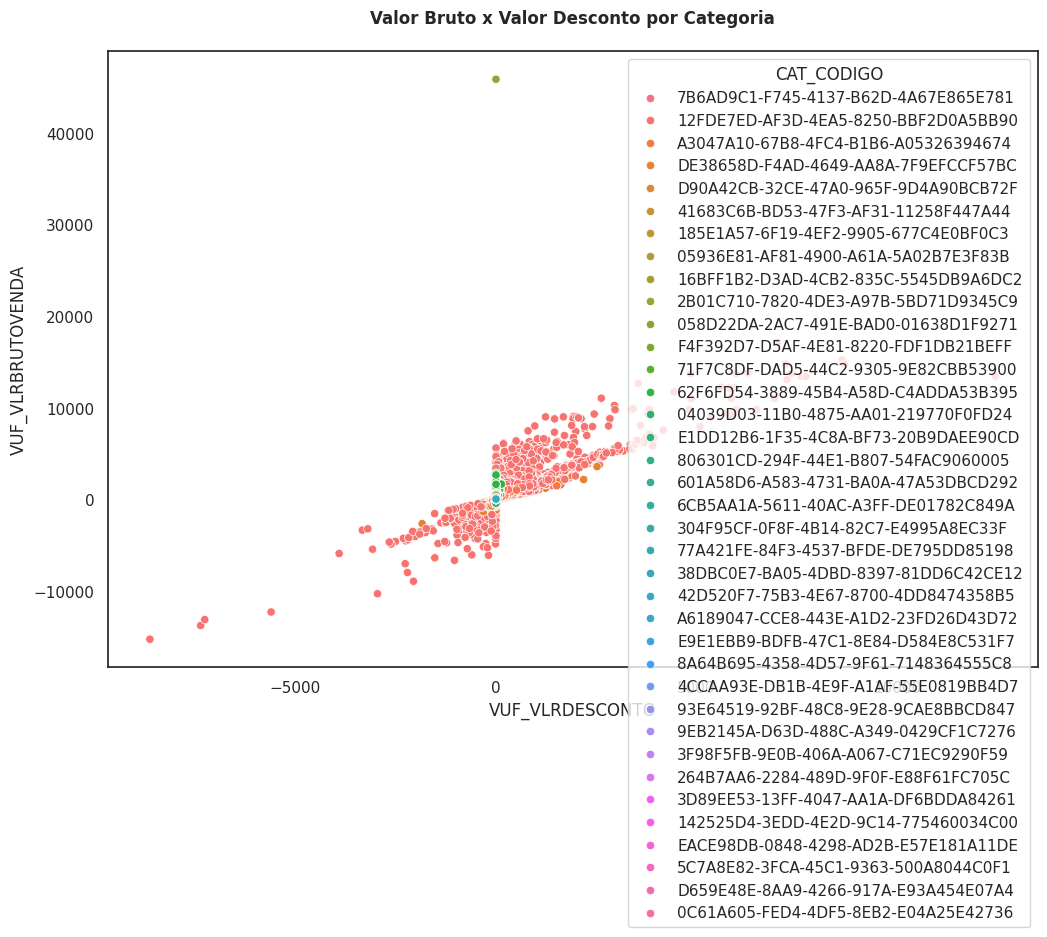

In [16]:
casting.gráfico_scatterplot(
    dataframe=df,
    y='VUF_VLRBRUTOVENDA',
    x='VUF_VLRDESCONTO',
    hue='CAT_CODIGO',
    titulo='Valor Bruto x Valor Desconto por Categoria'
)

#### Histplot - Distribuição das categorias:

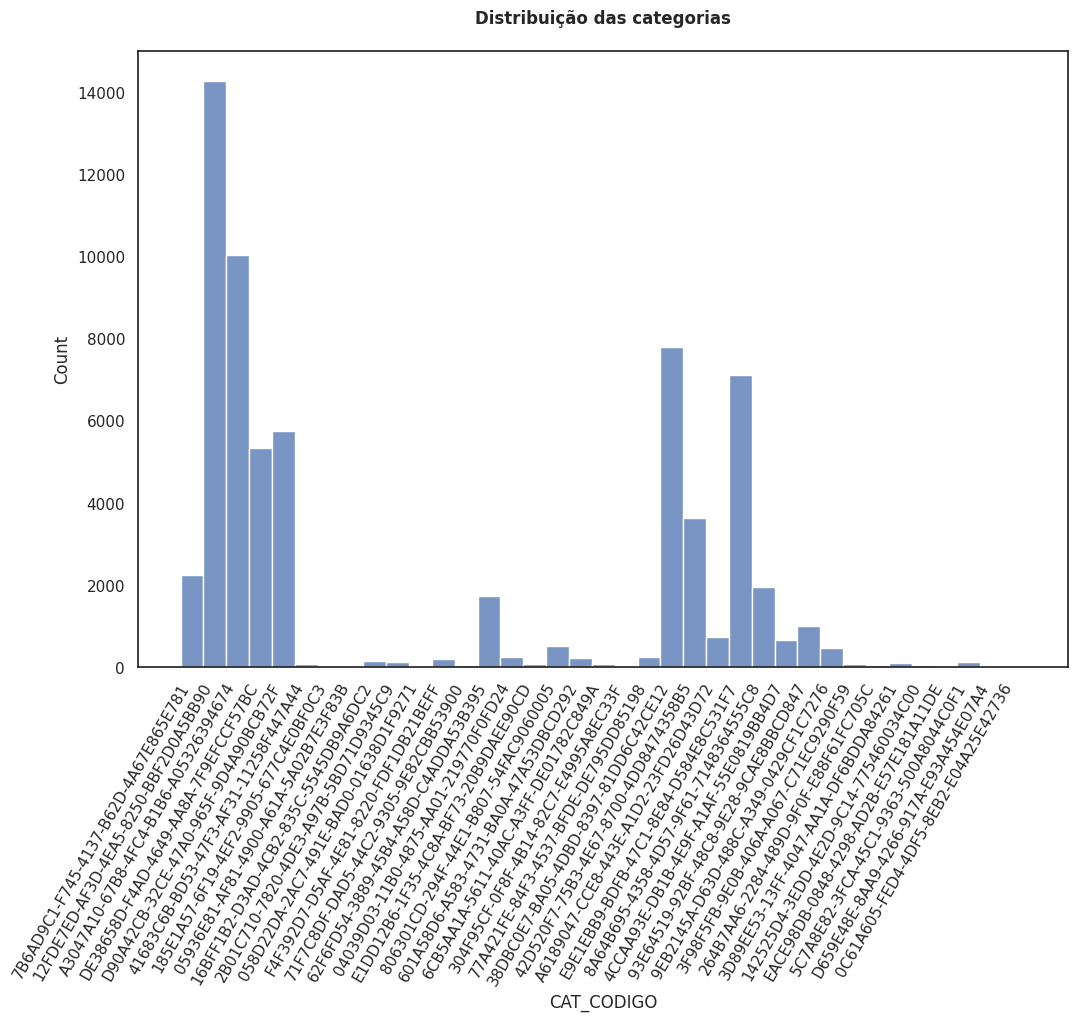

In [17]:
casting.gráfico_histplot(
    dataframe=df,
    coluna='CAT_CODIGO',
    titulo='Distribuição das categorias'
)

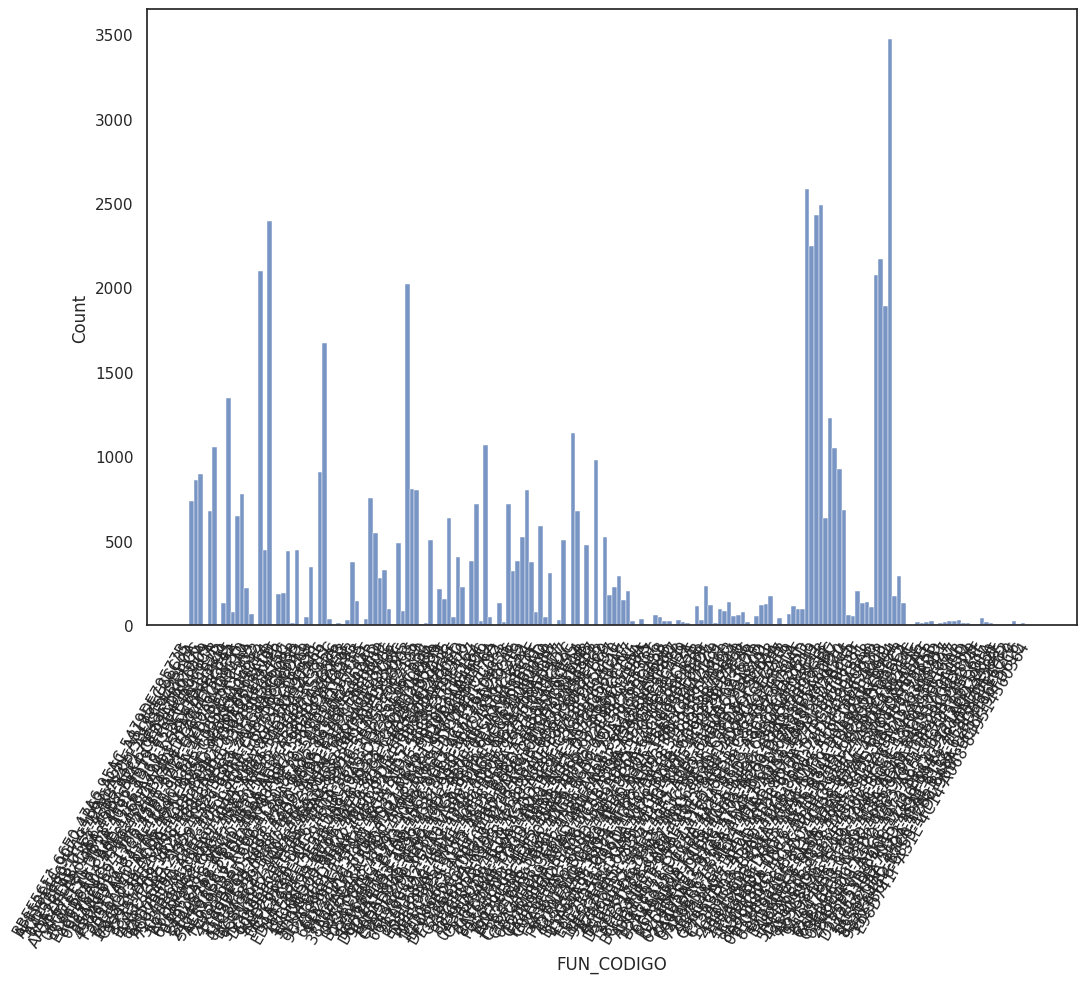

In [18]:
casting.gráfico_histplot(
    dataframe=df,
    coluna='FUN_CODIGO',
)

### Cliente (CASTING_DB106):

#### Qual é a Quantidade de Transações por Mês?

In [50]:
# Agrupe por mês e conte o número de transações em cada mês
qtd_de_transacoes_por_mes = df_db106.groupby(df_db106.index.to_period('M')).size()

# Renomeie as colunas para que sejam mais descritivas
qtd_de_transacoes_por_mes = qtd_de_transacoes_por_mes.reset_index()
qtd_de_transacoes_por_mes.columns = ['Mês', 'Quantidade de Transações']

# Converta o período em uma representação de string do mês
qtd_de_transacoes_por_mes['Mês'] = qtd_de_transacoes_por_mes['Mês'].dt.strftime('%Y-%m')

#### Quantidade de Transações por Mês:

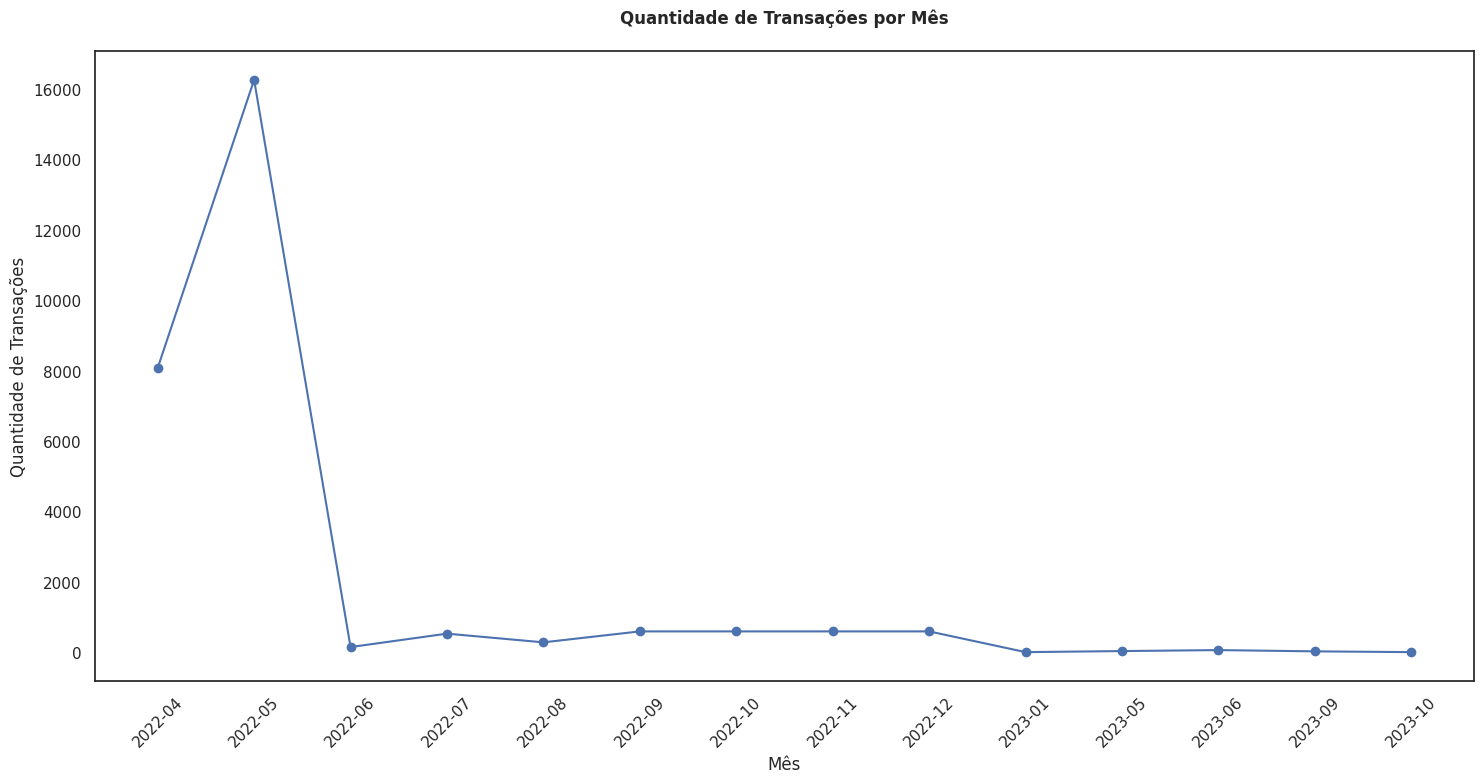

In [51]:
casting.gráfico_linha_plot(
    data=qtd_de_transacoes_por_mes,
    x='Mês',
    y='Quantidade de Transações',
    figsize=(15,8),
    titulo='Quantidade de Transações por Mês',
    titulo_x='Mês',
    titulo_y='Quantidade de Transações',
)

#### Qual é o Faturamento por Mês?

In [56]:
# Agrupe por mês e conte o número de transações em cada mês
faturamento_por_mes = df_db106.groupby(df_db106.index.to_period('M'))['VUF_VLRLIQFINAL'].sum()

# Renomeie as colunas para que sejam mais descritivas
faturamento_por_mes = faturamento_por_mes.reset_index()
faturamento_por_mes.columns = ['Mês', 'Faturamento']

# Converta o período em uma representação de string do mês
faturamento_por_mes['Mês'] = faturamento_por_mes['Mês'].dt.strftime('%Y-%m')

#### Faturamento por mês:

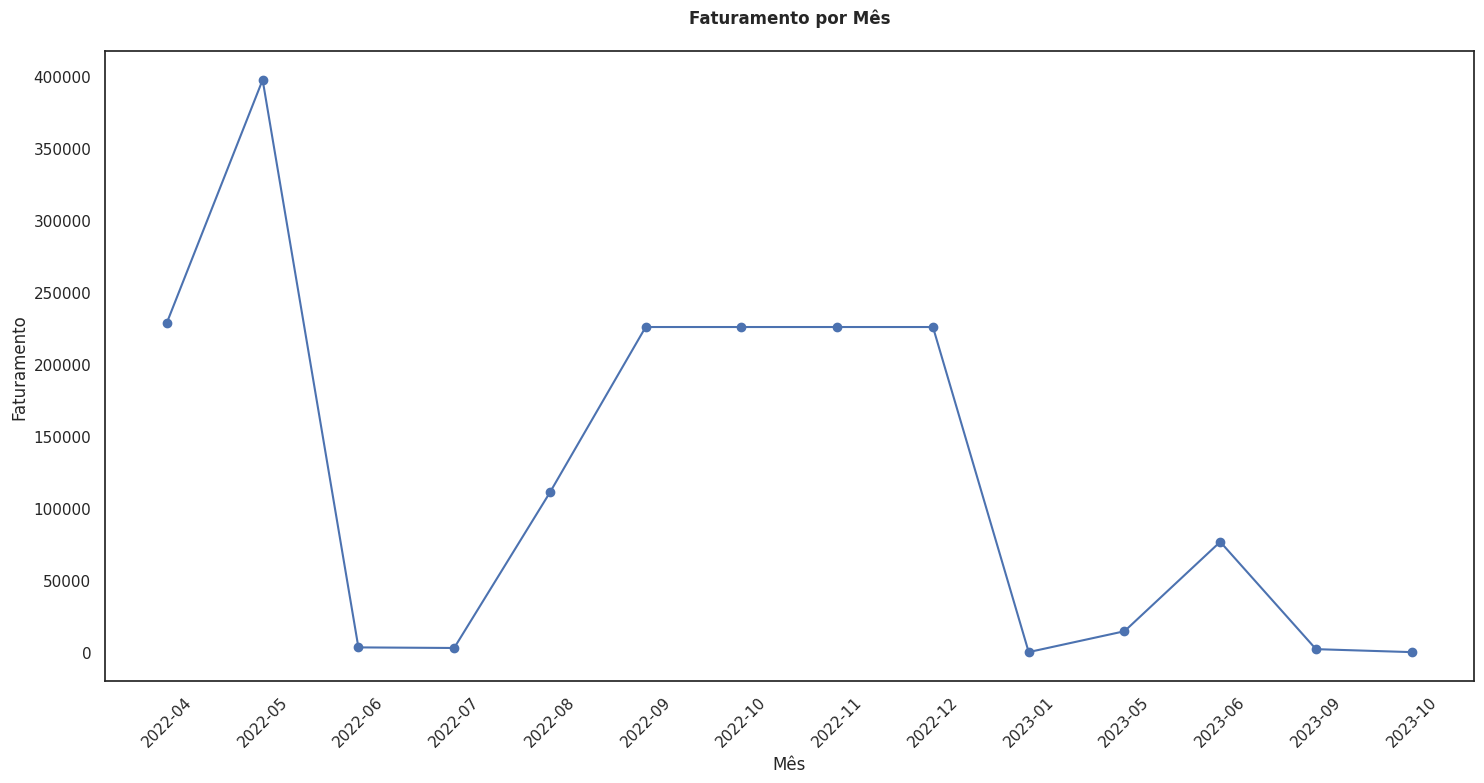

In [57]:
casting.gráfico_linha_plot(
    data=faturamento_por_mes,
    x='Mês',
    y='Faturamento',
    figsize=(15,8),
    titulo='Faturamento por Mês',
    titulo_x='Mês',
    titulo_y='Faturamento',
)

#### Histplot - Quantidade de Transações por Mês:

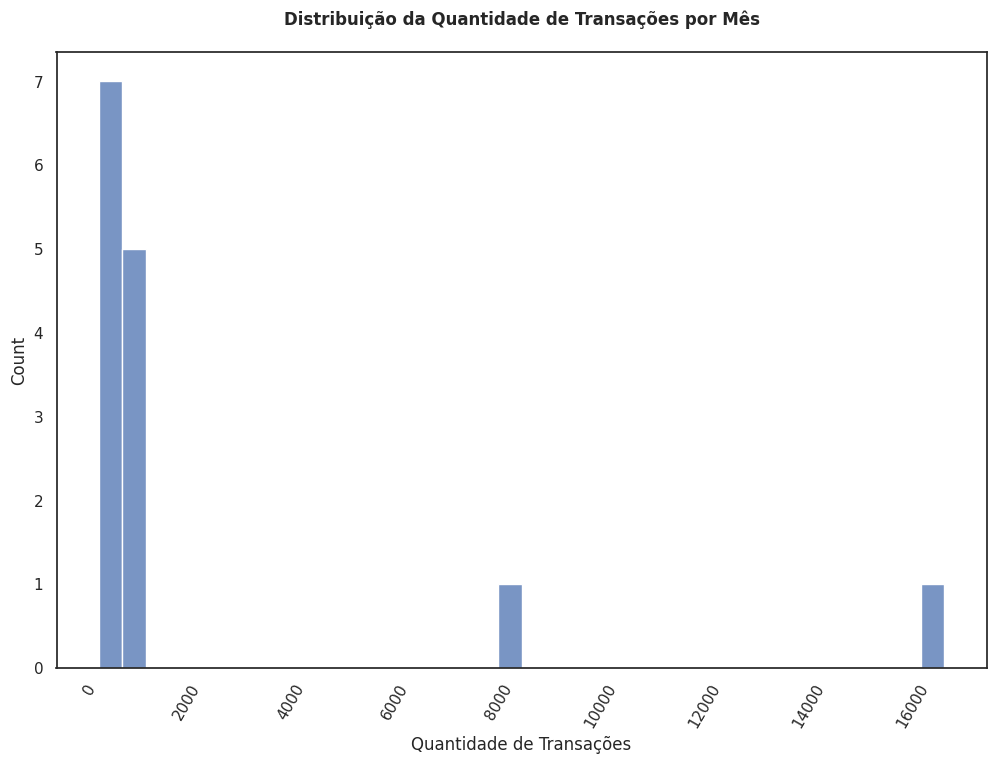

In [58]:
casting.gráfico_histplot(
    dataframe=qtd_de_transacoes_por_mes,
    coluna='Quantidade de Transações',
    titulo='Distribuição da Quantidade de Transações por Mês'
)

#### Histplot - Faturamento por Mês:

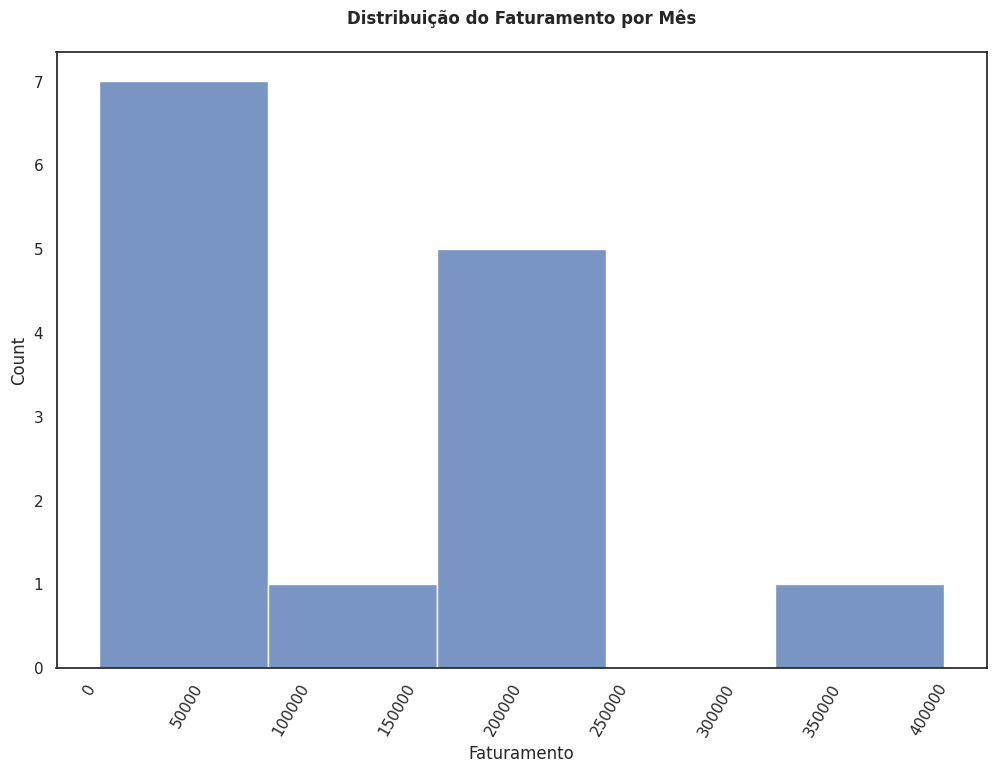

In [59]:
casting.gráfico_histplot(
    dataframe=faturamento_por_mes,
    coluna='Faturamento',
    titulo='Distribuição do Faturamento por Mês'
)

### Cliente (CASTING_DB108):

#### Qual é a Quantidade de Transações por Mês?

In [60]:
# Agrupe por mês e conte o número de transações em cada mês
qtd_de_transacoes_por_mes = df_db108.groupby(df_db108.index.to_period('M')).size()

# Renomeie as colunas para que sejam mais descritivas
qtd_de_transacoes_por_mes = qtd_de_transacoes_por_mes.reset_index()
qtd_de_transacoes_por_mes.columns = ['Mês', 'Quantidade de Transações']

# Converta o período em uma representação de string do mês
qtd_de_transacoes_por_mes['Mês'] = qtd_de_transacoes_por_mes['Mês'].dt.strftime('%Y-%m')

#### Quantidade de Transações por Mês:

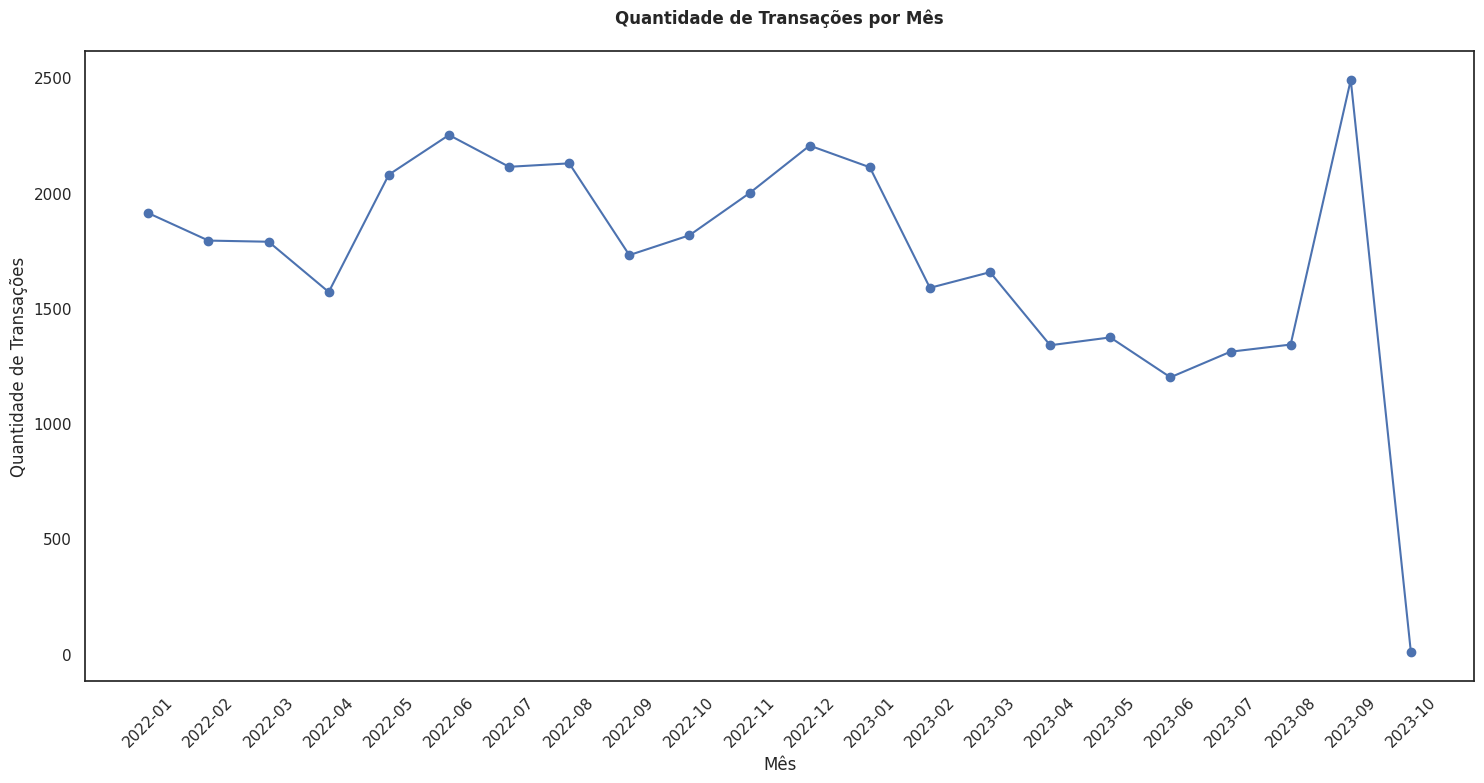

In [61]:
casting.gráfico_linha_plot(
    data=qtd_de_transacoes_por_mes,
    x='Mês',
    y='Quantidade de Transações',
    figsize=(15,8),
    titulo='Quantidade de Transações por Mês',
    titulo_x='Mês',
    titulo_y='Quantidade de Transações',
)

#### Qual é o Faturamento por Mês?

In [62]:
# Agrupe por mês e conte o número de transações em cada mês
faturamento_por_mes = df_db108.groupby(df_db108.index.to_period('M'))['VUF_VLRLIQFINAL'].sum()

# Renomeie as colunas para que sejam mais descritivas
faturamento_por_mes = faturamento_por_mes.reset_index()
faturamento_por_mes.columns = ['Mês', 'Faturamento']

# Converta o período em uma representação de string do mês
faturamento_por_mes['Mês'] = faturamento_por_mes['Mês'].dt.strftime('%Y-%m')

#### Faturamento por mês:

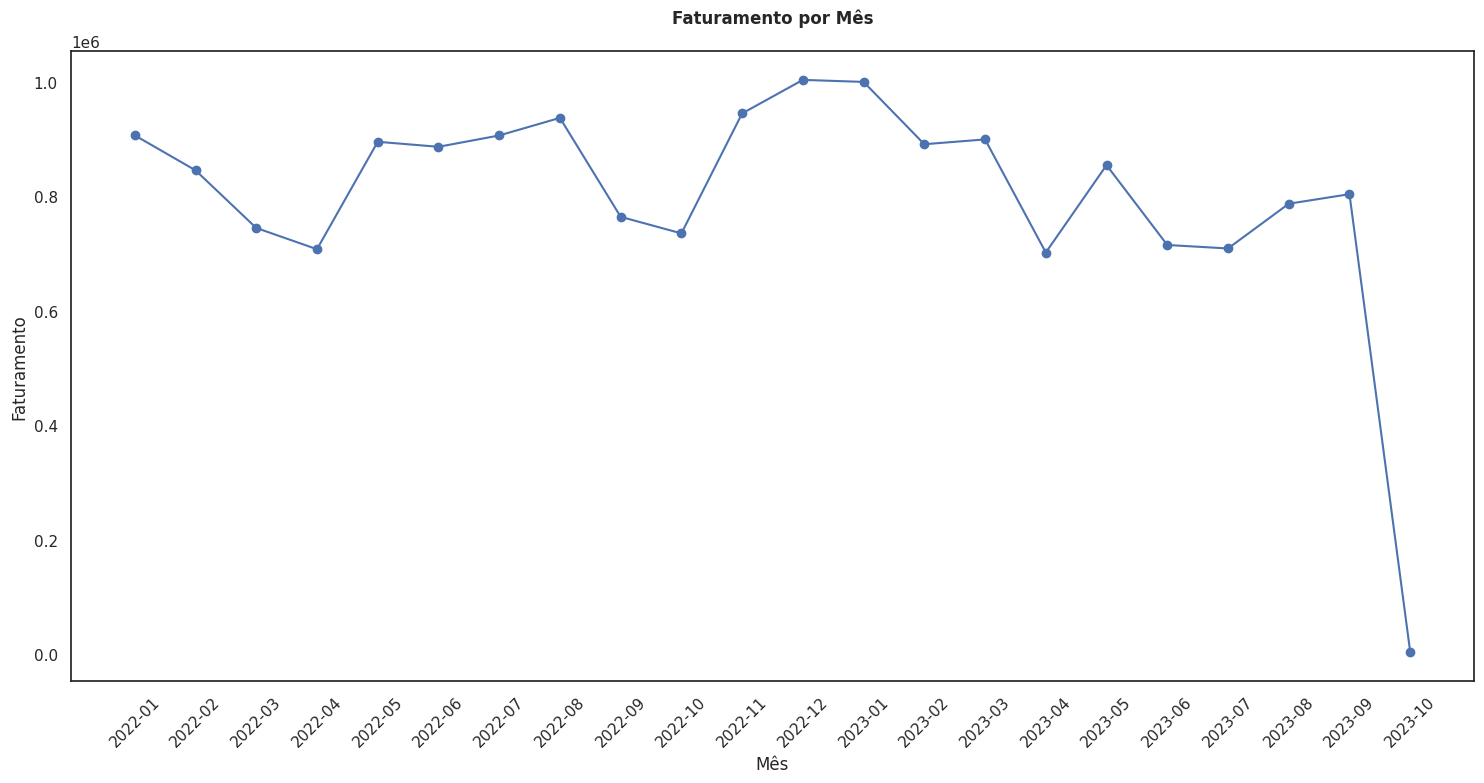

In [63]:
casting.gráfico_linha_plot(
    data=faturamento_por_mes,
    x='Mês',
    y='Faturamento',
    figsize=(15,8),
    titulo='Faturamento por Mês',
    titulo_x='Mês',
    titulo_y='Faturamento',
)

#### Histplot - Quantidade de Transações por Mês:

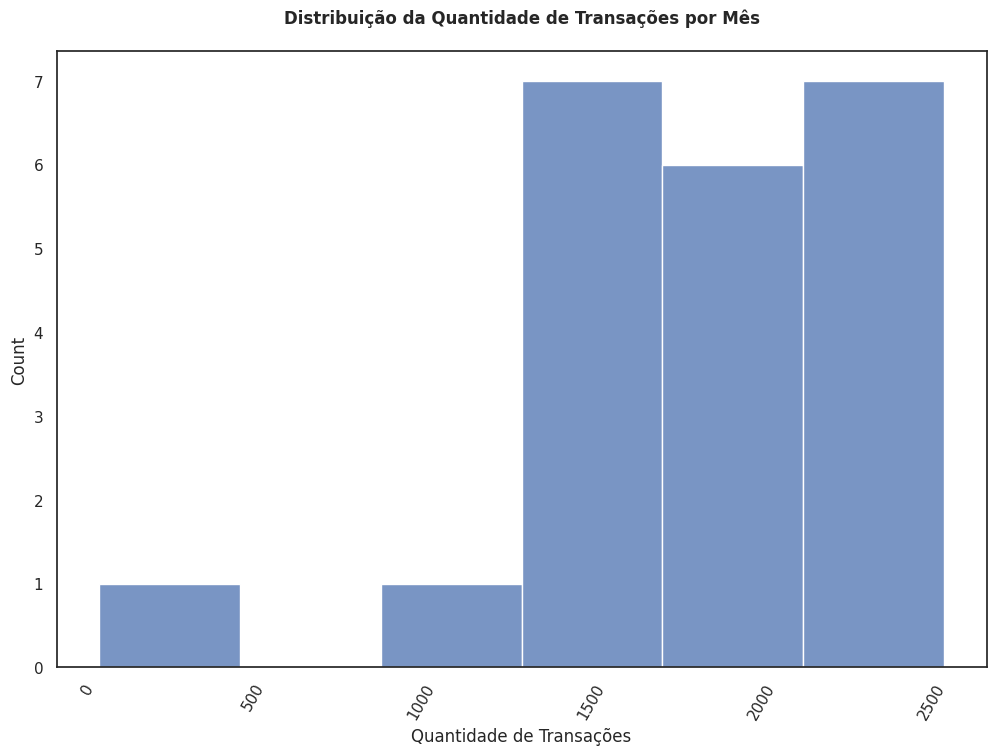

In [64]:
casting.gráfico_histplot(
    dataframe=qtd_de_transacoes_por_mes,
    coluna='Quantidade de Transações',
    titulo='Distribuição da Quantidade de Transações por Mês'
)

#### Histplot - Faturamento por Mês:

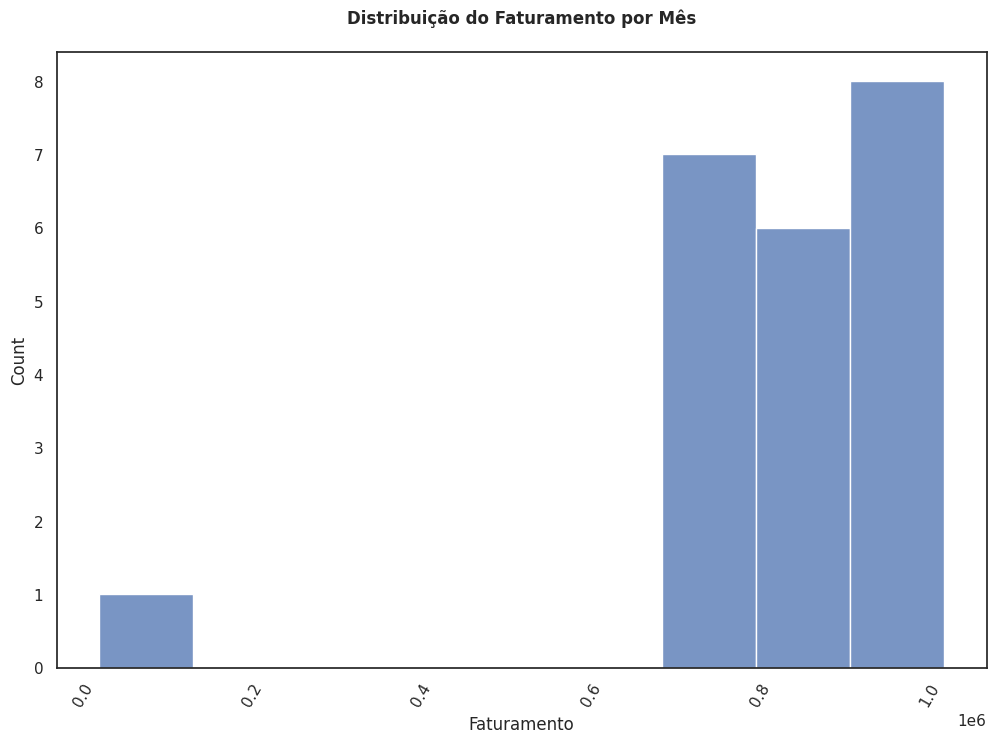

In [66]:
casting.gráfico_histplot(
    dataframe=faturamento_por_mes,
    coluna='Faturamento',
    titulo='Distribuição do Faturamento por Mês'
)